# Rasheed Hameed
# Final Project - Online Shoppers Purchasing Intention
__http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#__



In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
#to suppresss the orange warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Exploration

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.31517,3.32178,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.8186,176.779,0,0,7.5,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503569,1.27016,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.4724,140.749,0,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7315,44.4755,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1194.75,1913.67,0,184.137,598.937,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221914,0.0484883,0,0,0.00311247,0.0168126,0.2
ExitRates,12330,NaN,NaN,NaN,0.0430728,0.0485965,0,0.0142857,0.0251564,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


__Feature engineering, where true and false will be converted to 0 or 1__

In [4]:
df.Weekend.replace([True, False], [1, 0], inplace=True)

In [5]:
df.Revenue.replace([True, False], [1, 0], inplace=True)

__Numerical Attributes__

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


*Columns Month, VisitorType seems to have text values that do not translate well with describe profiler.  Dummies will be used to convert these categoricals to numericals*

In [7]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

__These features below with the histograms in blue represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.  The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.__

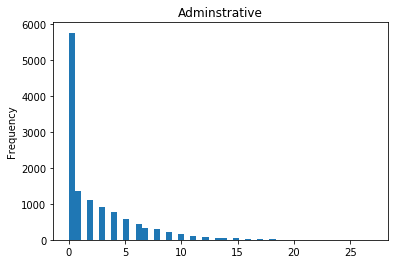

In [8]:
df.Administrative.plot(kind="hist", bins=50, title = 'Adminstrative')

*majority of the data falls near the between 1 and 10*

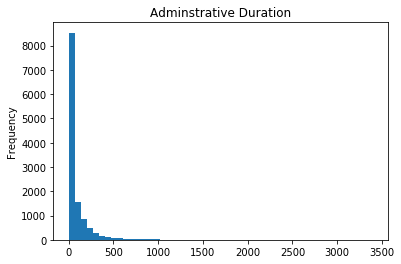

In [9]:
df.Administrative_Duration.plot(kind="hist", bins=50, title = 'Adminstrative Duration' )

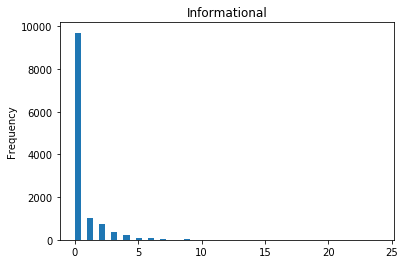

In [10]:
df['Informational'].plot(kind="hist", bins=50, title = 'Informational')

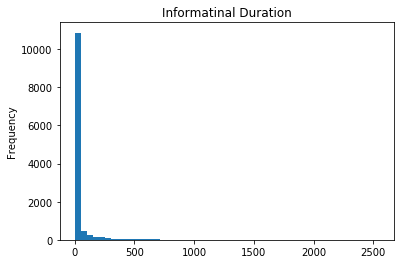

In [11]:
df.Informational_Duration.plot(kind="hist", bins=50, title = 'Informatinal Duration')

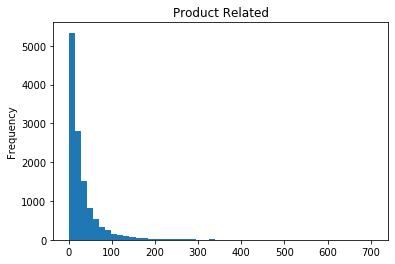

In [12]:
df.ProductRelated.plot(kind="hist", bins=50, title = 'Product Related')

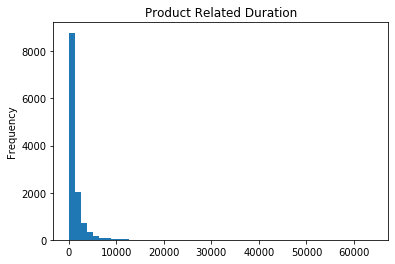

In [13]:
df.ProductRelated_Duration.plot(kind="hist", bins=50, title = 'Product Related Duration')

__The features in red histograms represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.__

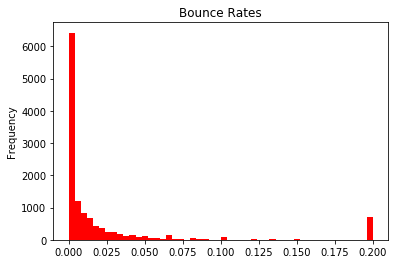

In [14]:
df.BounceRates.plot(kind="hist", bins=50,color='red', title = 'Bounce Rates')

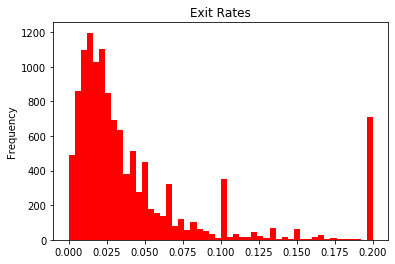

In [15]:
df.ExitRates.plot(kind="hist", bins=50,color='red', title = 'Exit Rates')

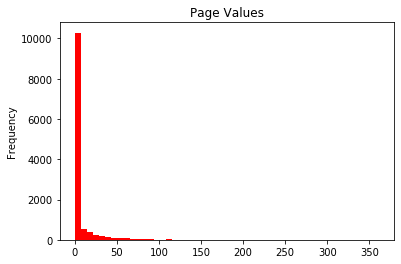

In [16]:
df.PageValues.plot(kind="hist", bins=50,color='red', title = 'Page Values')

__The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8__

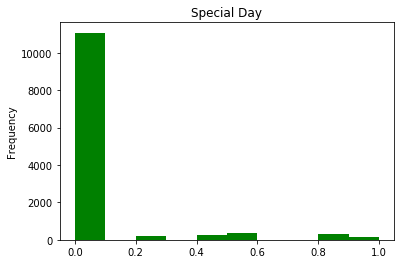

In [17]:
df.SpecialDay.plot(kind="hist", color='green', title ='Special Day')

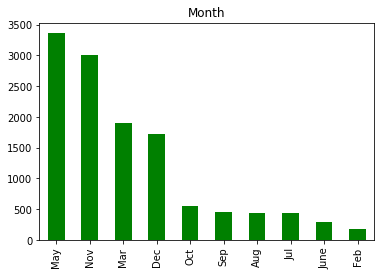

In [18]:
df['Month'].value_counts().plot(kind='bar', color='green', title ='Month')

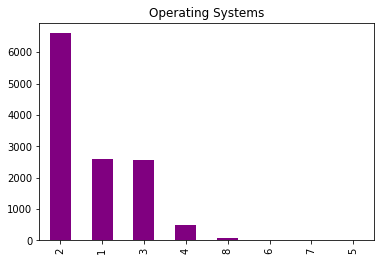

In [19]:
df['OperatingSystems'].value_counts().plot(kind='bar', color='purple', title = 'Operating Systems')

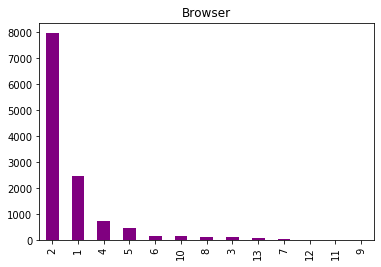

In [20]:
df['Browser'].value_counts().plot(kind='bar', color='purple', title ='Browser')

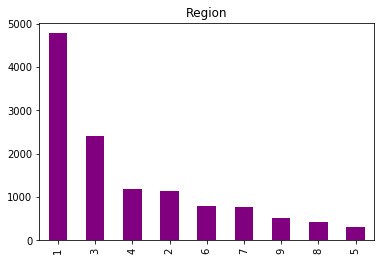

In [21]:
df['Region'].value_counts().plot(kind='bar', color='purple', title = 'Region')

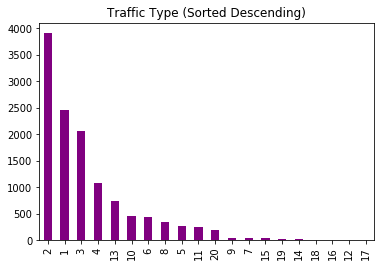

In [22]:
df['TrafficType'].value_counts().plot(kind='bar', color='purple', title = 'Traffic Type (Sorted Descending)')

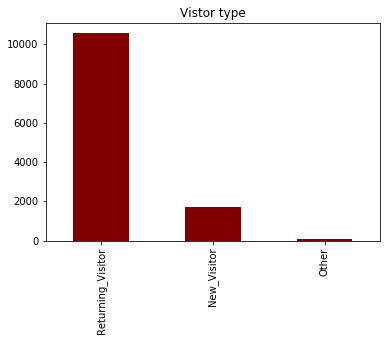

In [23]:
df['VisitorType'].value_counts().plot(kind='bar', color='maroon', title = 'Vistor type')

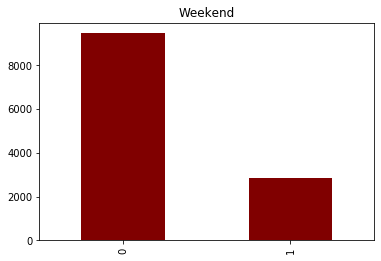

In [24]:
df['Weekend'].value_counts().plot(kind='bar', color='maroon', title = 'Weekend')

In [25]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

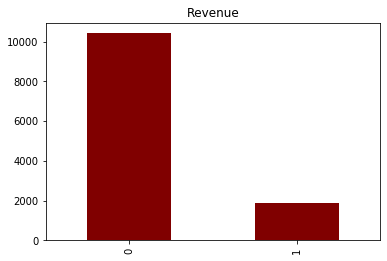

In [26]:
df.Revenue.value_counts().plot(kind='bar', color='maroon', title = 'Revenue')

In [27]:
df2 = df
df2.Revenue.replace([1, 0], ['Yes','No'], inplace=True)
#df2.Weekend.replace([1, 0], ['Yes','No'], inplace=True)

In [28]:
gg = pd.crosstab(df2.Weekend, df2.Revenue)
gg


Revenue,No,Yes
Weekend,,
0,8053,1409
1,2369,499


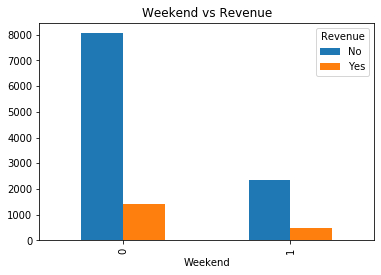

In [29]:
plt.show(gg.plot(kind="bar", title = 'Weekend vs Revenue'))

*From above plot we can say that the Weekend Online browser don't end up complete their shopping by purchasing*

In [30]:
gg = pd.crosstab(df['VisitorType'], df2["Revenue"])
gg

Revenue,No,Yes
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


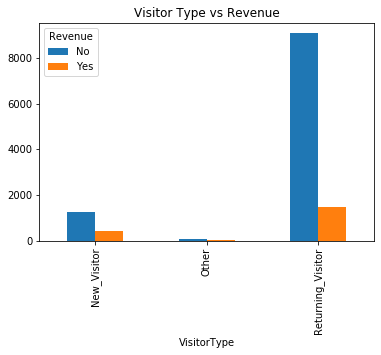

In [31]:
plt.show(gg.plot(kind="bar", title = 'Visitor Type vs Revenue'))

*We see above Revenue is more created from returning customers.  We can imply on the behavior that individuals will know exactly what they are looking for and would come back and purchase those same items.*

In [32]:
df_numeric = pd.get_dummies(df[[ 'Month', 'VisitorType']])

In [33]:
df_numeric.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
df_alternate = pd.concat([df, df_numeric],axis=1)

In [35]:
df_alternate.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_alternate.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [37]:
corr = df_alternate.corr()
corr.style.background_gradient(cmap='coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1,0.601583,0.37685,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.0989896,-0.0947776,-0.00634706,-0.0250346,-0.00548681,-0.0335607,0.0264168,0.0471589,-0.014443,-0.0656486,0.006221,-0.00190239,-0.0550356,-0.064587,0.0515744,0.0912659,0.0596065,0.0284487,-0.0211844,-0.0228838
Administrative_Duration,0.601583,1,0.30271,0.238031,0.289087,0.355422,-0.14417,-0.205798,0.0676085,-0.0733037,-0.00734342,-0.0153915,-0.00556056,-0.0143764,0.0149901,0.0279505,-0.00499005,-0.0445239,-0.00209577,-0.0189743,-0.0231981,-0.0393178,0.0324316,0.0551008,0.0313134,0.0250433,-0.00854176,-0.0225245
Informational,0.37685,0.30271,1,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.0486317,-0.0482193,-0.00952667,-0.0382347,-0.0291686,-0.0344908,0.0357847,0.00588154,0.00282192,-0.0403724,0.0018956,0.00717554,-0.0279566,-0.0384216,0.0637539,-0.00261884,0.00969203,-0.0534288,-0.021457,0.057399
Informational_Duration,0.255848,0.238031,0.618955,1,0.280046,0.347364,-0.0740666,-0.105276,0.0308609,-0.0305765,-0.00957868,-0.019285,-0.0271441,-0.0246749,0.0240785,0.00141238,0.0103143,-0.0280599,0.0149575,-0.0154069,-0.0115446,-0.0318106,0.0368991,0.00643353,0.00174447,-0.0431996,-0.0134892,0.0455008
ProductRelated,0.431119,0.289087,0.374164,0.280046,1,0.860927,-0.204578,-0.292526,0.0562818,-0.0239582,0.00428962,-0.0131457,-0.0381218,-0.0430643,0.016092,0.0279994,-0.033909,-0.0568631,0.0200341,0.0150724,-0.114672,-0.0722203,0.182339,0.00890701,0.00599655,-0.122727,-0.036083,0.128738
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1,-0.184541,-0.251984,0.0528231,-0.0363798,0.00297579,-0.00738044,-0.0330905,-0.0363772,0.00731061,0.00776703,-0.017563,-0.0465501,0.00227609,0.00150571,-0.0854908,-0.0681333,0.166951,-0.00877303,0.0059505,-0.116447,-0.0271833,0.120489
BounceRates,-0.223563,-0.14417,-0.116114,-0.0740666,-0.204578,-0.184541,1,0.913004,-0.119386,0.0727023,0.0238232,-0.0157722,-0.00648535,0.0782855,-0.046514,-0.0156621,-0.0169988,0.0630303,0.00976626,0.0411781,-0.00408969,0.0590625,-0.0342815,-0.0460445,-0.0400808,-0.139351,0.0281121,0.129908
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1,-0.174498,0.102242,0.0145667,-0.00444236,-0.00890701,0.0786163,-0.062587,-0.0209883,-0.0147002,0.0787087,0.00885232,0.0482762,0.013439,0.0728154,-0.0568098,-0.0624649,-0.050956,-0.183898,0.0347634,0.171987
PageValues,0.0989896,0.0676085,0.0486317,0.0308609,0.0562818,0.0528231,-0.119386,-0.174498,1,-0.0635413,0.0185079,0.0455919,0.0113153,0.0125317,0.0120016,0.000501527,0.0205182,-0.0331366,-0.0183167,-0.0208042,-0.0444512,-0.0150986,0.037856,0.0320455,0.0174389,0.104952,0.0552036,-0.115825
SpecialDay,-0.0947776,-0.0733037,-0.0482193,-0.0305765,-0.0239582,-0.0363798,0.0727023,0.102242,-0.0635413,1,0.0126522,0.00349875,-0.016098,0.0523014,-0.0167672,-0.0589159,-0.124635,0.106596,-0.0588454,-0.0477589,-0.132095,0.464809,-0.175039,-0.0666657,-0.0599655,-0.08274,-0.0257299,0.0871226


*In the above correlation plot, some are abvious such as Adminstrative website relates to Adminstrative duration while one shows prominance such as Month_May attribute is correlated with Special day.  This is shows that Mothers day fall during month of may as shoppers will make purchase for their mothers on Mother day in the month of may.*

# Unsupervised Learning

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
data = df_alternate
#X_train = data[['Administrative', 'Administrative_Duration', 'Informational',
 #      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
  #     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
   #     'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb',
    #   'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
     #  'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
      # 'VisitorType_Other', 'VisitorType_Returning_Visitor'  ]]
X_train = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
        'Weekend',  'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'  ]]
target = data['Revenue']

In [40]:
X_train.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,0,0,0,1


In [41]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [42]:
X_train.shape

(12330, 18)

In [43]:
target.head(3)

0    No
1    No
2    No
Name: Revenue, dtype: object

In [44]:
kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization

In [45]:
kmeans.fit(X_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 14557385209.346539
start iteration
done sorting
end inner loop
Iteration 1, inertia 13719878795.276752
start iteration
done sorting
end inner loop
Iteration 2, inertia 13468361919.413763
start iteration
done sorting
end inner loop
Iteration 3, inertia 13375698732.168995
start iteration
done sorting
end inner loop
Iteration 4, inertia 13317124886.102404
start iteration
done sorting
end inner loop
Iteration 5, inertia 13279489669.344908
start iteration
done sorting
end inner loop
Iteration 6, inertia 13260024988.426888
start iteration
done sorting
end inner loop
Iteration 7, inertia 13247782904.759377
start iteration
done sorting
end inner loop
Iteration 8, inertia 13244589341.613653
start iteration
done sorting
end inner loop
Iteration 9, inertia 13241852819.002731
start iteration
done sorting
end inner loop
Iteration 10, inertia 13240791216.569977
start iteration
done sorting
end inner loop
Iterati

Iteration 11, inertia 13305354598.963747
start iteration
done sorting
end inner loop
Iteration 12, inertia 13275177675.09641
start iteration
done sorting
end inner loop
Iteration 13, inertia 13258193803.144606
start iteration
done sorting
end inner loop
Iteration 14, inertia 13244487336.071226
start iteration
done sorting
end inner loop
Iteration 15, inertia 13227778088.77543
start iteration
done sorting
end inner loop
Iteration 16, inertia 13222321544.217154
start iteration
done sorting
end inner loop
Iteration 17, inertia 13220316898.62723
start iteration
done sorting
end inner loop
Iteration 18, inertia 13219312797.287981
start iteration
done sorting
end inner loop
Iteration 19, inertia 13218296576.287302
start iteration
done sorting
end inner loop
Iteration 20, inertia 13217210855.876074
start iteration
done sorting
end inner loop
Iteration 21, inertia 13216200238.90554
start iteration
done sorting
end inner loop
Iteration 22, inertia 13215368073.635738
start iteration
done sorting

done sorting
end inner loop
Iteration 6, inertia 13406481506.941957
start iteration
done sorting
end inner loop
Iteration 7, inertia 13351303968.985506
start iteration
done sorting
end inner loop
Iteration 8, inertia 13306609036.382381
start iteration
done sorting
end inner loop
Iteration 9, inertia 13275845754.202986
start iteration
done sorting
end inner loop
Iteration 10, inertia 13258522102.701468
start iteration
done sorting
end inner loop
Iteration 11, inertia 13244899482.538046
start iteration
done sorting
end inner loop
Iteration 12, inertia 13228203208.015568
start iteration
done sorting
end inner loop
Iteration 13, inertia 13222321544.217154
start iteration
done sorting
end inner loop
Iteration 14, inertia 13220316898.62723
start iteration
done sorting
end inner loop
Iteration 15, inertia 13219312797.287981
start iteration
done sorting
end inner loop
Iteration 16, inertia 13218296576.287302
start iteration
done sorting
end inner loop
Iteration 17, inertia 13217210855.876074
s

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [46]:
clusters = kmeans.predict(X_train)

In [47]:
print(clusters     )

[0 0 0 ... 0 0 0]


In [48]:
centroids = kmeans.cluster_centers_

In [49]:
target.shape

(12330,)

In [50]:
centroids.shape

(3, 18)

In [51]:
np.set_printoptions(precision=5,suppress=True)
print (centroids)

[[    1.81983    62.04119     0.32732    19.96891    18.60684   576.33605
      0.02546     0.04772     5.49487     0.06414     2.12074     2.36744
      3.16903     4.14902     0.23487     0.1575      0.00788     0.83461]
 [    7.43961   295.36489     2.74879   266.72309   236.10628 10886.17437
      0.00594     0.01969     4.52137     0.03092     2.14976     2.30918
      2.58454     3.61836     0.25121     0.00483     0.00483     0.99034]
 [    4.32069   154.7208      1.17299    84.58696    77.68842  3353.70624
      0.00713     0.02167     8.05648     0.05068     2.13809     2.30905
      3.09509     3.70916     0.21902     0.04805     0.00202     0.94992]]


In [52]:
traincol=[]
for key,value in X_train.iteritems():
    traincol.append(key)

In [53]:
print ("\t\tAttribute Name\tCluster 0\tCluster 1\tCluster 2")
for i in range((X_train.shape[1])):
    print ("%30s\t%.8f\t%.8f\t%.8f" %(traincol[i],centroids[0][i],centroids[1][i], centroids[2][i]))

		Attribute Name	Cluster 0	Cluster 1	Cluster 2
                Administrative	1.81983048	7.43961353	4.32068791
       Administrative_Duration	62.04119025	295.36489079	154.72079884
                 Informational	0.32732111	2.74879227	1.17298938
        Informational_Duration	19.96891008	266.72309447	84.58696216
                ProductRelated	18.60684013	236.10628019	77.68841679
       ProductRelated_Duration	576.33604946	10886.17436548	3353.70624215
                   BounceRates	0.02545759	0.00593976	0.00713076
                     ExitRates	0.04772076	0.01968831	0.02166782
                    PageValues	5.49487216	4.52137028	8.05647591
                    SpecialDay	0.06414350	0.03091787	0.05068285
              OperatingSystems	2.12073724	2.14975845	2.13808801
                       Browser	2.36743544	2.30917874	2.30905412
                        Region	3.16903213	2.58454106	3.09509358
                   TrafficType	4.14902425	3.61835749	3.70915529
                       Weekend	0.23

In [54]:
from sklearn.metrics import completeness_score, homogeneity_score
print("Completeness Score: ",completeness_score(target,clusters))
print("Homogeneity Score: ",homogeneity_score(target,clusters))


Completeness Score:  0.015934804648042894
Homogeneity Score:  0.01932075812691264


# Supervised Learning

In [55]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(X_train, target, test_size = 0.2, random_state = 33)

In [56]:
print(train.shape)
print(test.shape)
print(target_train.shape)
print(target_test.shape)

(9864, 18)
(2466, 18)
(9864,)
(2466,)


In [57]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(train)

In [58]:
train_norm = min_max_scaler.transform(train)
test_norm = min_max_scaler.transform(test)

In [59]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN

In [60]:
#KNN
nn = 5
knnclf = neighbors.KNeighborsClassifier(nn, weights = 'distance')
knnclf.fit(train_norm, target_train)
knnpreds_test = knnclf.predict(test_norm)
print(knnpreds_test)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [61]:
unique_elements, counts_elements = np.unique(knnpreds_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['No' 'Yes']
 [2325 141]]


In [62]:
print(classification_report(target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       0.87      0.97      0.92      2081
         Yes       0.61      0.22      0.33       385

    accuracy                           0.86      2466
   macro avg       0.74      0.60      0.62      2466
weighted avg       0.83      0.86      0.83      2466



In [63]:
knncm = confusion_matrix(target_test, knnpreds_test)


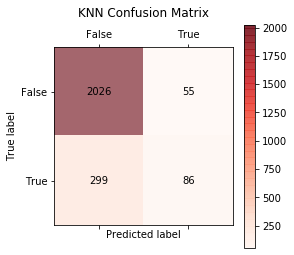

In [64]:
plt.matshow(knncm, cmap = plt.cm.Reds, alpha=0.6)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [65]:
#accuracy score on the training data
print ('Test to see accuracy on training:', knnclf.score(train_norm, target_train))
print ('Accuracy score on test set is: ', knnclf.score(test_norm, target_test))

Test to see accuracy on training: 1.0
Accuracy score on test set is:  0.8564476885644768


# Decision Trees

In [66]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(train, target_train)

In [67]:
treepreds_test=treeclf.predict(test)

In [68]:
print(classification_report(target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.92      0.92      0.92      2081
         Yes       0.56      0.58      0.57       385

    accuracy                           0.86      2466
   macro avg       0.74      0.75      0.74      2466
weighted avg       0.86      0.86      0.86      2466



In [69]:
treecm = confusion_matrix(target_test, treepreds_test)

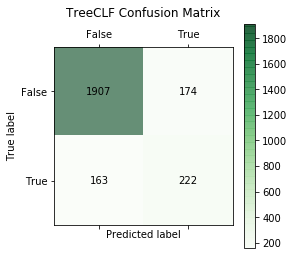

In [70]:
plt.matshow(treecm, cmap = plt.cm.Greens, alpha=0.6)
plt.title("TreeCLF Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(treecm.shape[0]):
    for x in range(treecm.shape[1]):
        plt.text(x, y, '{}'.format(treecm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [71]:
#accuracy score on the training data
print ('Test to see accuracy on training:', treeclf.score(train, target_train))
print ('Accuracy score is: ', treeclf.score(test, target_test))

Test to see accuracy on training: 0.9973641524736415
Accuracy score is:  0.8633414436334145


# Logistic Regression

In [72]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [73]:
logistic = LogisticRegression(random_state=1)

In [74]:
logistic = logistic.fit(train, target_train)

In [75]:
logpreds_test = logistic.predict(test)

In [76]:
print (classification_report(target_test, logpreds_test))

              precision    recall  f1-score   support

          No       0.89      0.98      0.93      2081
         Yes       0.76      0.37      0.50       385

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.72      2466
weighted avg       0.87      0.88      0.87      2466



In [77]:
logisticcm = confusion_matrix(target_test, logpreds_test)

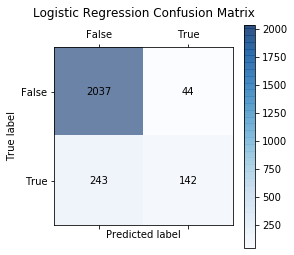

In [78]:
plt.matshow(logisticcm, cmap = plt.cm.Blues, alpha=0.6)
plt.title("Logistic Regression Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(logisticcm.shape[0]):
    for x in range(logisticcm.shape[1]):
        plt.text(x, y, '{}'.format(logisticcm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [79]:
print ('Training Score: ', logistic.score(train, target_train))
print ('Testing Score: ', logistic.score(test, target_test))

Training Score:  0.8815896188158961
Testing Score:  0.883617193836172


# Model 2 Logistic Regression (removed correlated variables)

In [80]:
X_train = data[['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
        'Weekend',  'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'  ]]

In [81]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_test = train_test_split(X_train, target, test_size = 0.2, random_state = 33)

In [82]:
logistic = LogisticRegression(random_state=1)

In [83]:
logistic = logistic.fit(train, target_train)

In [84]:
logpreds_test = logistic.predict(test)

In [85]:
print (classification_report(target_test, logpreds_test))

              precision    recall  f1-score   support

          No       0.89      0.98      0.93      2081
         Yes       0.76      0.37      0.50       385

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.87      2466



In [86]:
logisticcm = confusion_matrix(target_test, logpreds_test)

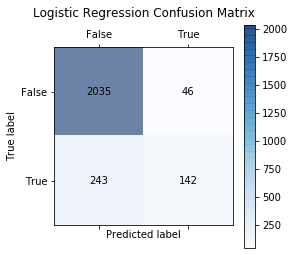

In [87]:
plt.matshow(logisticcm, cmap = plt.cm.Blues, alpha=0.6)
plt.title("Logistic Regression Confusion Matrix\n")
plt.xticks([0,1], ['False', 'True'])
plt.yticks([0,1], ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for y in range(logisticcm.shape[0]):
    for x in range(logisticcm.shape[1]):
        plt.text(x, y, '{}'.format(logisticcm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [88]:
print ('Training Score: ', logistic.score(train, target_train))
print ('Testing Score: ', logistic.score(test, target_test))

Training Score:  0.8816909975669099
Testing Score:  0.8828061638280617
